#### Ridge Regression

In [42]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import Ridge #type : ignore
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing

In [43]:
data = fetch_california_housing()

In [44]:

df = pd.DataFrame(data.data,columns=data.feature_names)

In [45]:
target = pd.DataFrame(data.target,columns=data.target_names)

In [46]:
y= target

In [47]:
X = df

In [48]:
X.drop(columns=['Latitude','Longitude'],axis=1,inplace=True)

In [49]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [50]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [51]:
from sklearn.model_selection import train_test_split


In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=25,test_size=0.3)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
ridge_reg = Ridge()
parameters = { 'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,50,70,80,90]}
ridgecv = GridSearchCV(ridge_reg,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 50, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [55]:
print(ridgecv.best_params_)


{'alpha': 40}


In [56]:
print(ridgecv.best_score_)

-0.614629866535687


In [57]:
y_pred = ridgecv.predict(X_test)

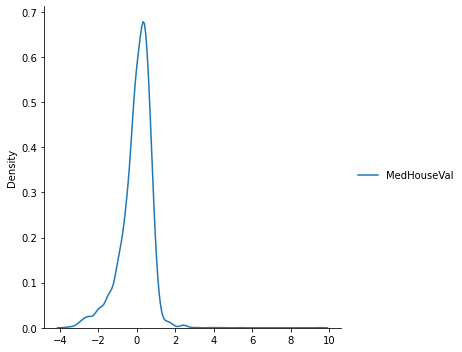

In [58]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [59]:
from sklearn.metrics import r2_score,accuracy_score

In [60]:
r2_score(y_test,y_pred)

0.5317226017963355